# Intro

Jason Schatz
11/16/16

Generate maps of select donwscaled climate data (LOCA data).  These maps were generated
from daily downscaled 1/16th degree climate data from 28 GCMs for three time periods:
 (1)	Historical/present:	1986-2005
 (2)	Mid-century:  	    2040-2059
 (3)	Late-century:	    2080-2099
The variables currently available are daily minimum and maximum temperature, and daily 
precipitation. For more information visit: http://loca.ucsd.edu/

The maps below represent the mean of means from the 28 GCMs for each time period.  In
other words, for each GCM I computed the mean number of days per year over various 
temperature thresholds (e.g. 90F, 95F, 100F) for each time period.  Once those means
were calculated for each GCM, I calculated the mean of all 28 GCMs and plotted it below.

# Import libraries

In [1]:
import cartopy
import fnmatch
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib import gridspec
from mpl_toolkits.basemap import Basemap
import netCDF4
from netCDF4 import Dataset
import numpy as np
import os
from pylab import *

# Define functions

In [2]:
#### plot single map of a given metric
## @' param item:  parameter to plot
## @' param lower: first year for evaluating %coverage
## @' param upper: last year for evaluating %coverage
## other parameters are pass-throughs from panel_map function
def make_map(item, lower, upper, lat_0, lon_0, xi, yi):
	map1 = Basemap(width = 650000, height = 750000,
            resolution = 'l', projection = 'stere',
            lat_ts = 40, lat_0 = lat_0, lon_0 = lon_0)
	map1.pcolor(xi, yi, np.squeeze(item), vmin = lower, vmax = upper)
	map1.readshapefile('H:/Jason/GIS/Census/geometries/NM_counties', 'NM_counties', color = 'white')
	map1.readshapefile('H:/Jason/GIS/Political_boundaries/NM_state_boundary/NM_state', 'NM_state', color = 'black', linewidth = 3)

In [12]:
#### create 5-panel plot of maps of all time periods/scenarios for a given temperature metric
## @' param import_list: parameter to plot
## @' param metric:      which temperature metric to plot (e.g. mean, min, max)
## @' param threshold:   which temperature threshold to plot (e.g. d90F)
## @' param k:           sub-loop tracker
## @' param j:           loop tracker
def panel_map(import_list, metric, threshold):
	try:
		data = [i for i in import_list if metric in i]
		list_a = [Dataset(data[i], 'r') for i in range(len(data))]
		data1  = [list_a[i].variables['data'] for i in range(len(list_a))]
		list_b = [np.mean(data1[i], axis = 0) for i in range(len(list_a))]   # mean values for each grid cell across all models

		# set color bar upper and lower limits
		llim = 0
		ulim = int(math.ceil(np.max(list_b)))

		# create 2D array
		lons = list_a[0]['longitude'][:]
		lats = list_a[0]['latitude'][:]
		lon_0 = lons.mean()
		lat_0 = lats.mean()
		lon, lat = np.meshgrid(lons, lats)
		m = Basemap(width = 650000, height = 750000,
		            resolution = 'l',projection = 'stere',
   			        lat_ts = 40, lat_0 = lat_0, lon_0 = lon_0)
		xi, yi = m(lon, lat)

		# set figure specs
		fig = plt.figure(figsize = (14, 8)) 
		gs = gridspec.GridSpec(2, 3, width_ratios = [2, 1, 1]) 

		# create subplots
		ax1 = plt.subplot(gs[:, 0])
		title1 = "days/yr over " + str(threshold) + "F -- 1986-2005"
		ax1.set_title(title1)
		make_map(list_b[0], llim, ulim, lat_0, lon_0, xi, yi)
		cs1 = m.pcolor(xi, yi, np.squeeze(list_b[1]), vmin = llim, vmax = ulim)
		cbar1 = m.colorbar(cs1, location = 'bottom', pad = "5%")

		ax2 = plt.subplot(gs[0, 1])
		ax2.set_title("2040-2059 -- RCP 4.5")
		make_map(list_b[3], llim, ulim, lat_0, lon_0, xi, yi)

		ax3 = plt.subplot(gs[0, 2])
		ax3.set_title("2040-2059 -- RCP 8.5")
		make_map(list_b[4], llim, ulim, lat_0, lon_0, xi, yi)

		ax4 = plt.subplot(gs[1, 1])
		ax4.set_title("2080-2099 -- RCP 4.5")
		make_map(list_b[1], llim, ulim, lat_0, lon_0, xi, yi)

		ax5 = plt.subplot(gs[1, 2])
		ax5.set_title("2080-2099 -- RCP 8.5")
		make_map(list_b[2], llim, ulim, lat_0, lon_0, xi, yi)

		plt.tight_layout()
		outname = metric + "_annual_" + str(threshold) + "F_days.png"
		plt.show()
#		plt.savefig(outname, facecolor = fig.get_facecolor())
	finally:
		plt.clf()
		plt.cla()
		plt.close()

# Plotting setup

In [13]:
## set directory
path1 = "L:/LOCA_figures"
os.chdir(path1)	#set directory

## define list of thresholds and metrics
thresholds = [90, 95, 100, 105, 110]
#metrics = ["means", "maxes", "mins", "p90th", "p10th"]
metrics = ['means']

# Map each metric and temperature threshold

(only means are plotted in this example)

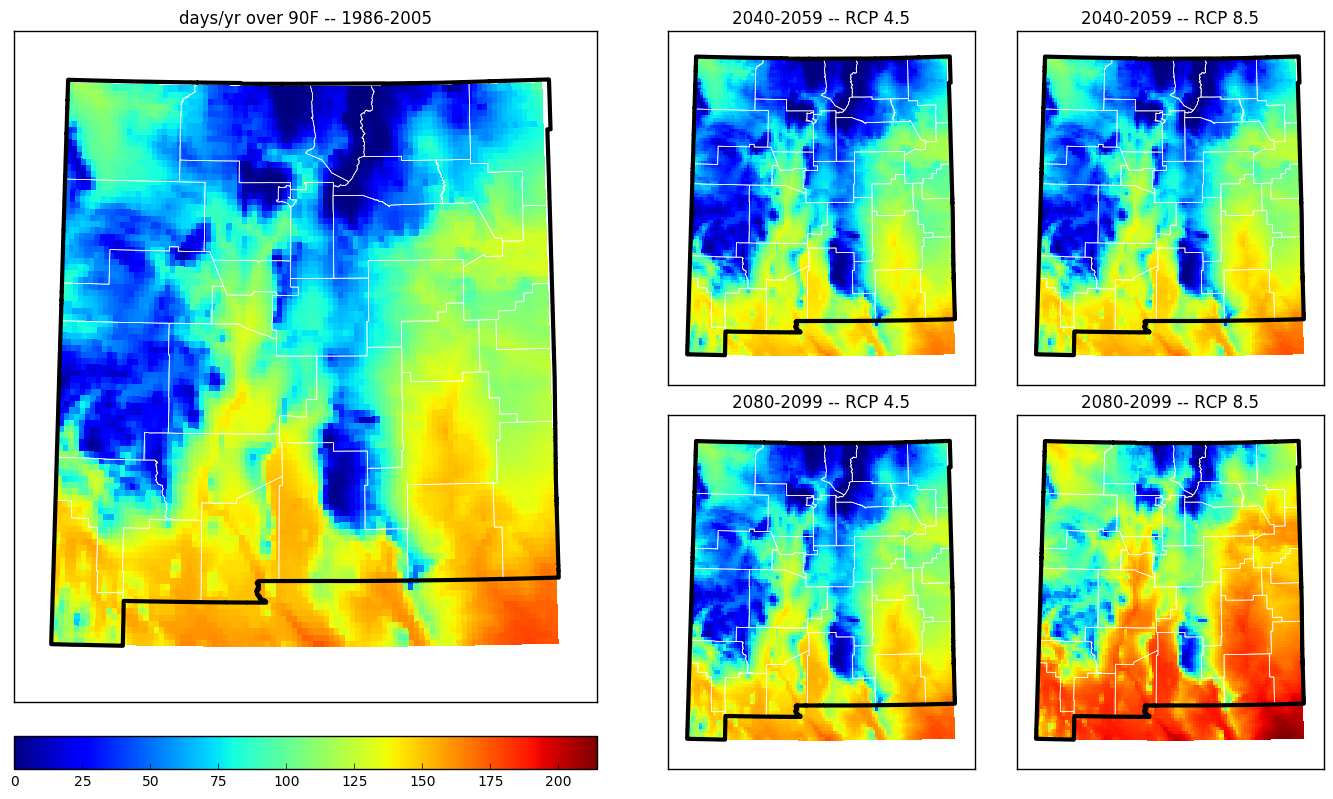

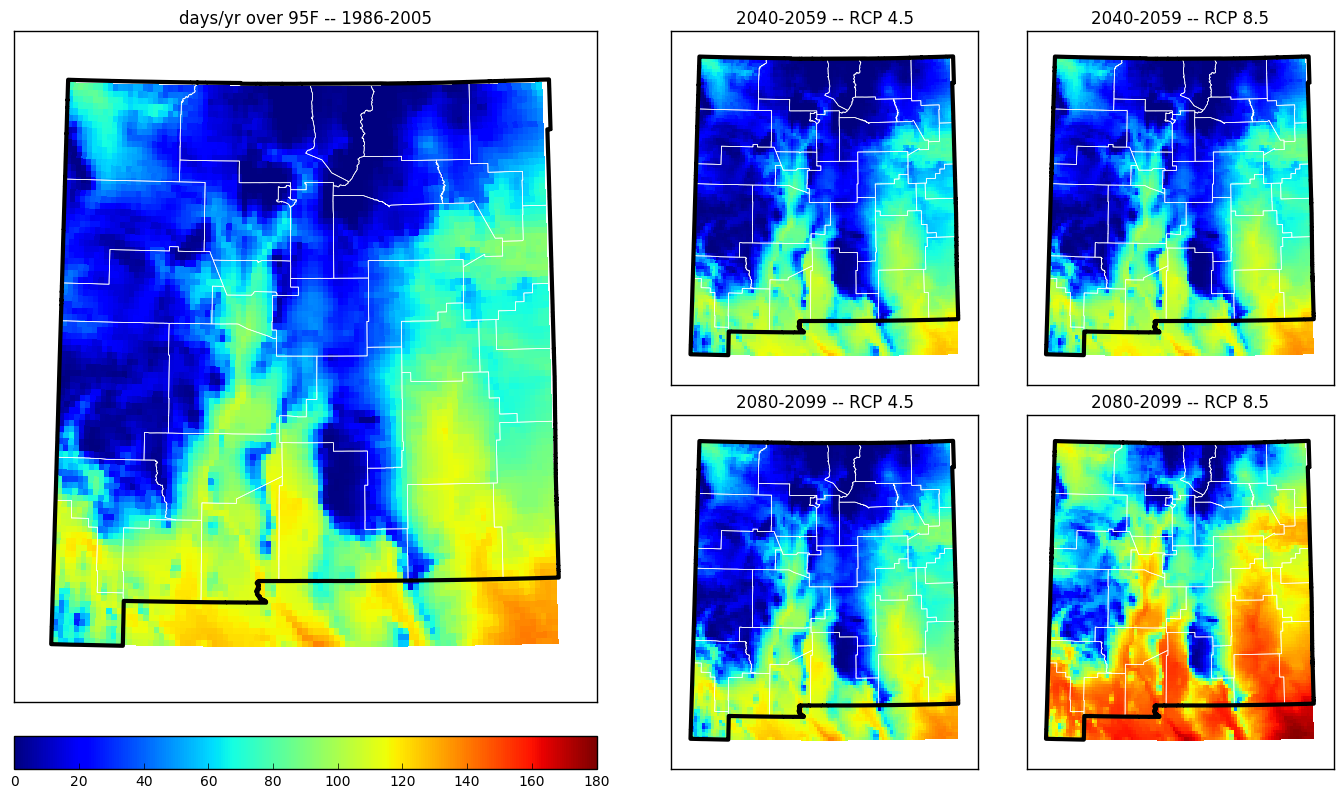

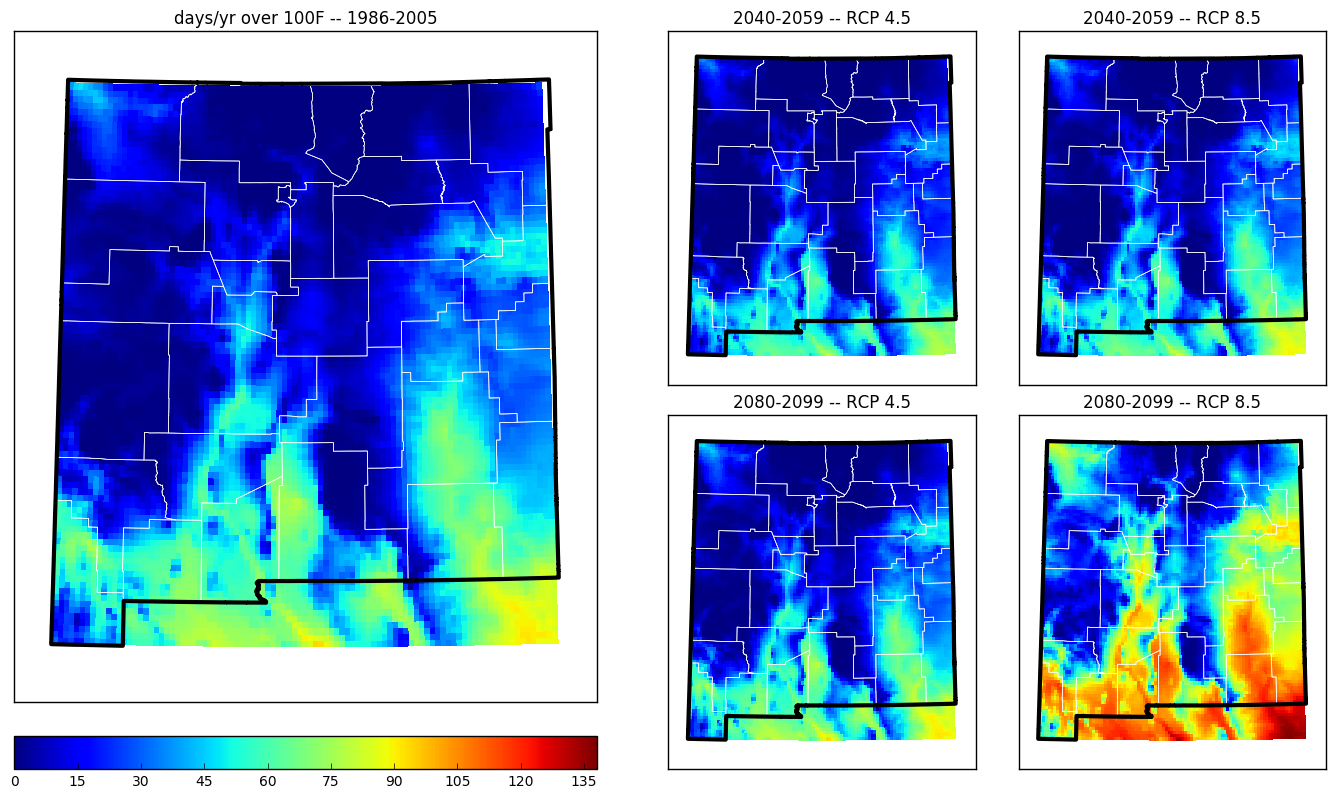

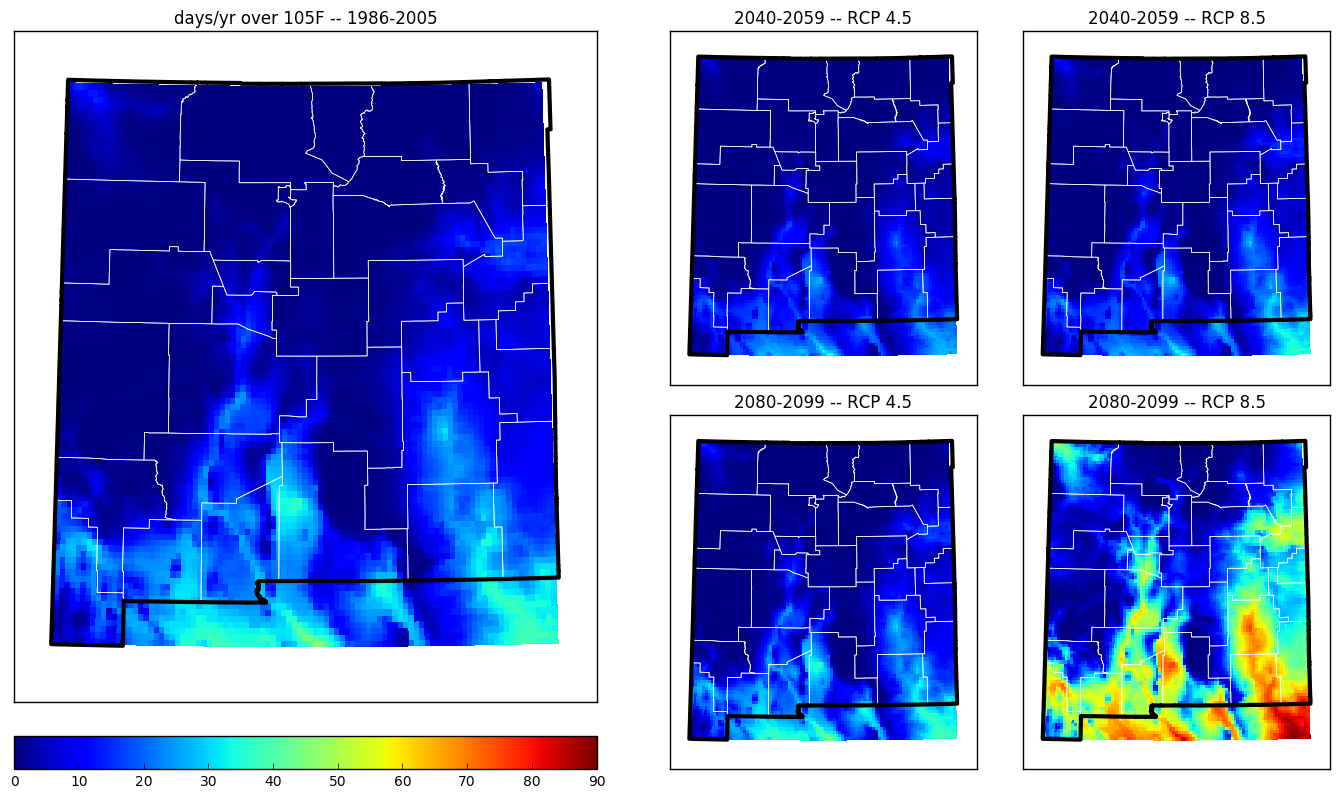

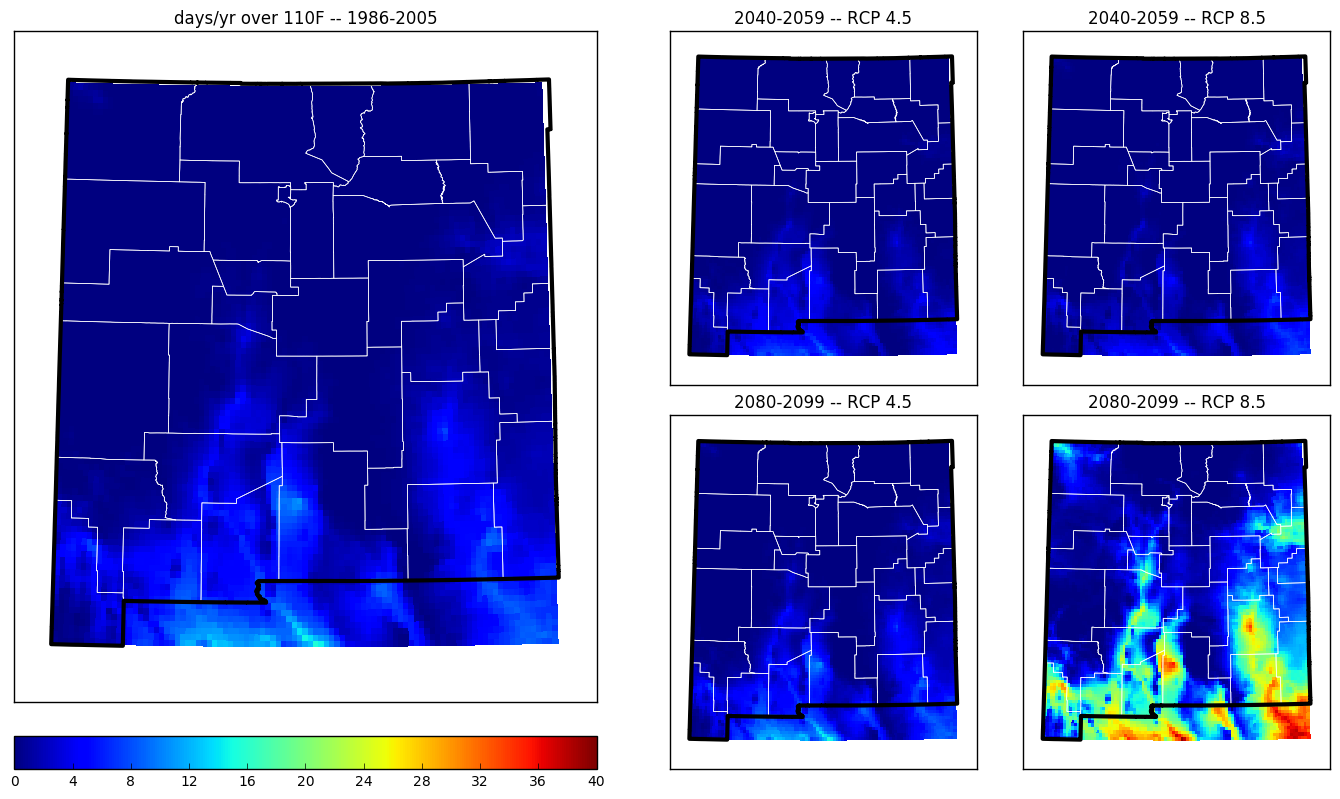

In [14]:
## import file lists for each temperature threshold
for threshold in thresholds:
	inpath = 'L:/LOCA_summaries_NM/d' + str(threshold) + 'F'
	import_list = []
	for root, dirnames, filenames in os.walk(inpath):
	    for filename in fnmatch.filter(filenames, '*.nc'):
	        import_list.append(os.path.join(root, filename))

	## generate multi-panel plots for each metric and threshold
	for metric in metrics:
		panel_map(import_list = import_list,
			      metric = metric, 
			      threshold = threshold)

# Changes from present day climate

(only changes in annual days over 100F are shown in this example)

Define mapping function

In [17]:
#### create 4-panel plot of maps of all time periods/scenarios for a given temperature metric
#### (change from 1986-2005 conditions).
## @' param import_list: parameter to plot
## @' param metric:      which temperature metric to plot (e.g. mean, min, max)
## @' param threshold:   which temperature threshold to plot (e.g. d90F)
## @' param k:           sub-loop tracker
## @' param j:           loop tracker
def panel_map(import_list, metric, threshold):
	try:
		data = [i for i in import_list if metric in i]
		list_a = [Dataset(data[i], 'r') for i in range(len(data))]
		data1  = [list_a[i].variables['data'] for i in range(len(list_a))]
		list_b = [np.mean(data1[i], axis = 0) for i in range(len(list_a))]   # mean values for each grid cell across all models
		list_b = [list_b[i] - list_b[0] for i in range(1,5)]   # change from historical period

		# set color bar upper and lower limits
		llim = 0
		ulim = int(math.ceil(np.max(list_b)))

		# create 2D array
		lons = list_a[0]['longitude'][:]
		lats = list_a[0]['latitude'][:]
		lon_0 = lons.mean()
		lat_0 = lats.mean()

		lon, lat = np.meshgrid(lons, lats)
		m = Basemap(width = 650000, height = 750000,
		            resolution = 'l',projection = 'stere',
   			        lat_ts = 40, lat_0 = lat_0, lon_0 = lon_0)
		xi, yi = m(lon, lat)

		# set figure specs
		fig = plt.figure(figsize = (10, 12)) 
		gs = gridspec.GridSpec(2, 2) 

		# create subplots
		ax1 = plt.subplot(gs[0, 0])
		ax1.set_title("2040-2059 -- RCP 4.5")
		make_map(list_b[2], llim, ulim, lat_0, lon_0, xi, yi)

		ax2 = plt.subplot(gs[0, 1])
		ax2.set_title("2040-2059 -- RCP 8.5")
		make_map(list_b[3], llim, ulim, lat_0, lon_0, xi, yi)

		ax3 = plt.subplot(gs[1, 0])
		ax3.set_title("2080-2099 -- RCP 4.5")
		make_map(list_b[0], llim, ulim, lat_0, lon_0, xi, yi)

		ax4 = plt.subplot(gs[1, 1])
		ax4.set_title("2080-2099 -- RCP 8.5")
		make_map(list_b[1], llim, ulim, lat_0, lon_0, xi, yi)

		cs1 = m.pcolor(xi, yi, np.squeeze(list_b[1]), vmin = llim, vmax = ulim)
		cbar1 = m.colorbar(cs1, location = 'bottom', pad = "1%")

		plt.tight_layout()
		outname = "change_" + str(metric) + "_annual_" + str(threshold) + "F_days.png"
		plt.show()
#		plt.savefig(outname, facecolor = fig.get_facecolor())

	finally:
		plt.clf()
		plt.cla()
		plt.close()

In [18]:
#------------#
#-- SET UP --#
#------------#
## set directory
path1 = "L:/LOCA_figures"
os.chdir(path1)

## create list of metrics and thresholds
#thresholds = [90, 95, 100, 105, 110]
#metrics = ["means", "maxes", "mins", "p90th", "p10th"]
thresholds = [100]
metrics = ['means']

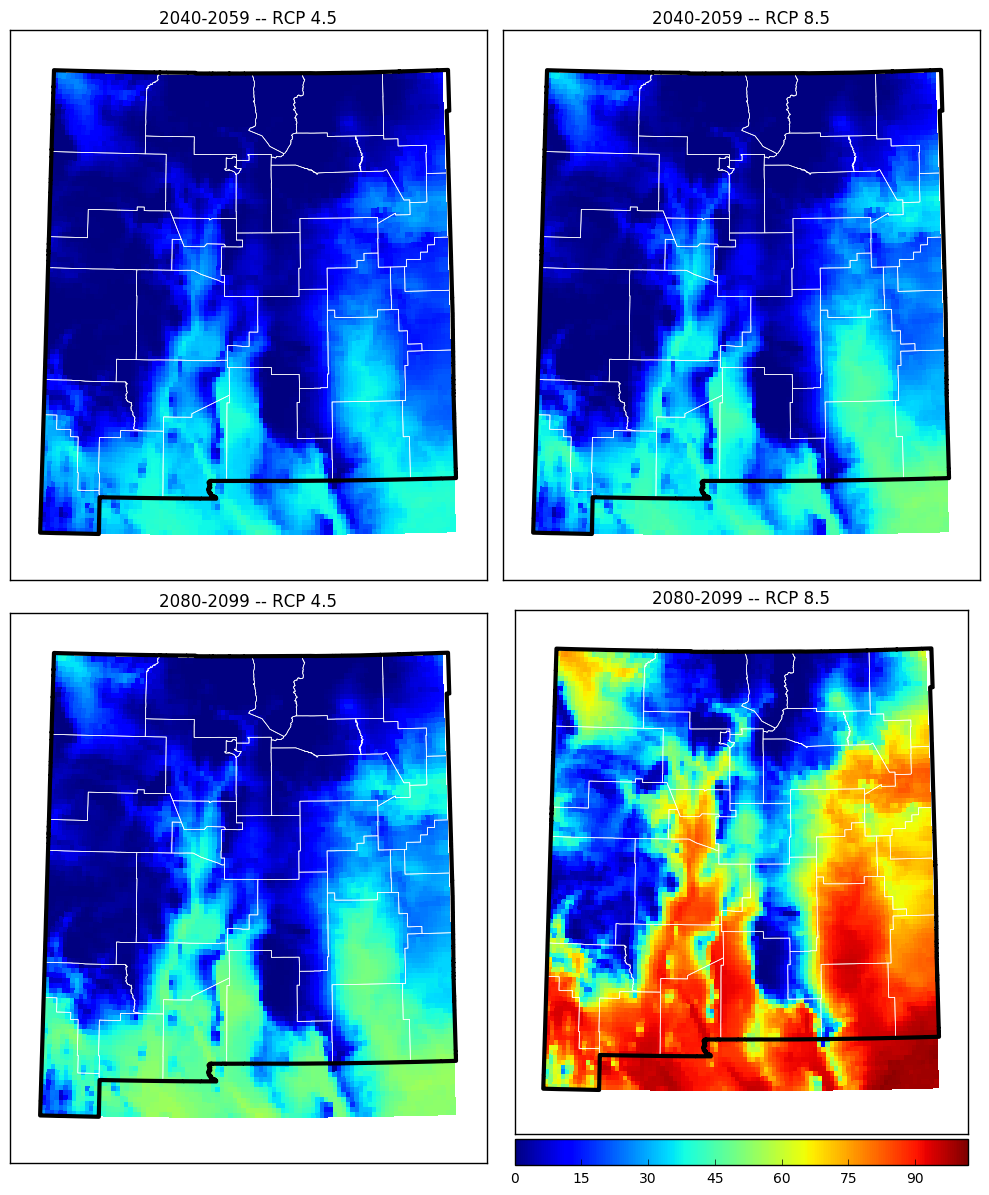

In [19]:
## import file lists
for threshold in thresholds:
	inpath = 'L:/LOCA_summaries_NM/d' + str(threshold) + 'F'
	import_list = []
	for root, dirnames, filenames in os.walk(inpath):
	    for filename in fnmatch.filter(filenames, '*.nc'):
	        import_list.append(os.path.join(root, filename))

	## generate multi-panel change plots for each metric and threshold
	for metric in metrics:
		panel_map(import_list = import_list, 
			      metric = metric, 
			      threshold = threshold)